# Create correlation heatmap from normalized and feature selected NF1 data

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn as sb

## Read in NF1 data `csv`

In [2]:
norm_fs_data = pathlib.Path("../../../4_processing_features/data/nf1_sc_norm_fs_cellprofiler.csv.gz")

data = pd.read_csv(norm_fs_data, index_col=0)
data

,Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_OrigNuclei,...,Nuclei_Texture_InfoMeas1_RFP_3_03_256,Nuclei_Texture_InfoMeas2_GFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_01_256
0,C,6,12,NF1,WT,1,1,C6,1,4,...,-1.197488,0.289091,0.969456,1.131385,1.303680,1.416917,-0.079438,-2.315521,-1.693210,2.881199
1,C,6,12,NF1,WT,1,1,C6,2,5,...,0.188414,0.611666,0.481954,0.748184,0.750277,0.511083,-0.065958,-1.460076,-1.427579,0.304121
2,C,6,12,NF1,WT,1,1,C6,3,7,...,-1.087258,0.843883,-0.214887,0.238299,0.482832,1.264950,-0.069749,-1.841707,-0.798368,0.257284
3,C,6,12,NF1,WT,1,1,C6,4,8,...,-1.250742,0.638684,1.163023,1.062039,1.082605,1.386850,-0.272864,-1.789888,-1.432404,1.083761
4,C,6,12,NF1,WT,4,1,C6,1,3,...,-0.258815,-2.222128,-0.048779,0.504843,1.340830,0.924382,0.612704,-2.158178,-1.781201,0.518641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,F,7,46,NF1,Null,32,1,F7,8,12,...,-0.730713,-3.721664,0.344692,0.526792,0.444591,0.664847,1.259085,0.745004,0.968347,-0.322389
145,F,7,46,NF1,Null,32,1,F7,9,13,...,0.925737,-1.410478,0.047610,-0.030179,-0.897448,-1.032699,0.849219,0.627234,0.096817,-0.326481
146,F,7,46,NF1,Null,32,1,F7,10,14,...,1.010381,-1.976427,-1.631117,-0.338652,-0.706971,-1.383757,0.484107,0.874705,0.836486,-0.367298
147,F,7,46,NF1,Null,32,1,F7,11,16,...,0.816456,-0.562581,-0.583551,0.145784,0.008261,-0.761469,-0.490888,0.058825,-0.088908,-0.304325


## Helper function to split `csv` into metadata and features

In [3]:
def split_data(pycytominer_output: pd.DataFrame):
    """
    split pycytominer output to return metadata dataframe

    Parameters
    ----------
    pycytominer_output : pd.DataFrame
        dataframe with pycytominer output

    Returns
    -------
    pd.Dataframe, np.array
        metadata dataframe, feature_data
    """
    # split metadata from features
    metadata_cols = [
        col_name
        for col_name in pycytominer_output.columns.tolist()
        if "Metadata" in col_name
    ]
    metadata_dataframe = pycytominer_output[metadata_cols]
    feature_data = pycytominer_output[pycytominer_output.columns.difference(metadata_cols)]

    return metadata_dataframe, feature_data

## Split NF1 data `csv`

In [4]:
metadata_dataframe, feature_data = split_data(data)
feature_data

,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_FormFactor,Cells_AreaShape_MaximumRadius,Cells_AreaShape_MedianRadius,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_InfoMeas1_RFP_3_03_256,Nuclei_Texture_InfoMeas2_GFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_01_256
0,-0.572221,0.667712,-0.009554,0.264079,0.463854,1.582286,-0.151997,-1.390352,2.178470,1.480541,...,-1.197488,0.289091,0.969456,1.131385,1.303680,1.416917,-0.079438,-2.315521,-1.693210,2.881199
1,1.293673,0.322177,2.286360,2.501898,1.122764,-0.093265,0.183837,0.065645,-0.285497,-0.207874,...,0.188414,0.611666,0.481954,0.748184,0.750277,0.511083,-0.065958,-1.460076,-1.427579,0.304121
2,-0.018945,-0.194305,-0.144742,-0.079778,-0.702888,-0.336227,-0.872407,-1.208937,0.234533,-0.288710,...,-1.087258,0.843883,-0.214887,0.238299,0.482832,1.264950,-0.069749,-1.841707,-0.798368,0.257284
3,1.018112,-0.545145,0.220632,0.644820,-0.873168,0.151905,-0.486779,0.713904,0.639545,0.873920,...,-1.250742,0.638684,1.163023,1.062039,1.082605,1.386850,-0.272864,-1.789888,-1.432404,1.083761
4,-1.107735,2.160816,-0.502534,0.644820,2.030555,0.720492,1.233248,3.019211,0.522371,0.794991,...,-0.258815,-2.222128,-0.048779,0.504843,1.340830,0.924382,0.612704,-2.158178,-1.781201,0.518641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-1.321130,3.283616,-1.009824,-0.376875,1.599989,-1.132114,2.175426,1.113361,-1.577001,-1.202978,...,-0.730713,-3.721664,0.344692,0.526792,0.444591,0.664847,1.259085,0.745004,0.968347,-0.322389
145,-0.823611,1.193446,-0.403809,0.394474,1.326061,-0.032073,1.326563,0.152387,0.289224,0.051021,...,0.925737,-1.410478,0.047610,-0.030179,-0.897448,-1.032699,0.849219,0.627234,0.096817,-0.326481
146,0.285412,0.101972,0.009590,0.780149,0.122676,-1.230529,0.206663,0.418395,-1.501735,0.072517,...,1.010381,-1.976427,-1.631117,-0.338652,-0.706971,-1.383757,0.484107,0.874705,0.836486,-0.367298
147,-0.529599,0.322288,-0.583080,0.264079,0.971550,-0.672573,0.647603,0.658406,-0.437785,-0.224140,...,0.816456,-0.562581,-0.583551,0.145784,0.008261,-0.761469,-0.490888,0.058825,-0.088908,-0.304325


## Transpose the NF1 dataframe

In [5]:
data_trans = feature_data.transpose()
data_trans


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
Cells_AreaShape_BoundingBoxArea,-0.572221,1.293673,-0.018945,1.018112,-1.107735,4.492992,0.034684,3.862003,0.156254,-0.653067,...,-0.619269,1.542217,0.560800,0.409742,0.506309,-1.321130,-0.823611,0.285412,-0.529599,-1.093078
Cells_AreaShape_FormFactor,0.667712,0.322177,-0.194305,-0.545145,2.160816,-1.427165,0.479554,-0.787164,-0.060946,-0.283157,...,0.186830,-1.311794,-0.724151,-0.615119,-0.842436,3.283616,1.193446,0.101972,0.322288,2.107963
Cells_AreaShape_MaximumRadius,-0.009554,2.286360,-0.144742,0.220632,-0.502534,2.069569,1.833441,2.688226,1.321017,-0.857875,...,-0.448862,-0.955878,-0.280539,-0.756730,0.836864,-1.009824,-0.403809,0.009590,-0.583080,-1.412912
Cells_AreaShape_MedianRadius,0.264079,2.501898,-0.079778,0.644820,0.644820,0.078352,2.044708,0.940747,2.501898,0.008800,...,0.008800,-1.506491,-0.961064,-1.124214,0.410516,-0.376875,0.394474,0.780149,0.264079,-0.677877
Cells_AreaShape_Solidity,0.463854,1.122764,-0.702888,-0.873168,2.030555,-2.416385,0.694352,-2.094593,0.394258,0.769240,...,0.614195,-1.485710,-1.172574,-1.473092,-0.403006,1.599989,1.326061,0.122676,0.971550,0.943990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nuclei_Texture_InfoMeas2_RFP_3_03_256,1.416917,0.511083,1.264950,1.386850,0.924382,0.874232,0.969989,0.677481,0.424027,-0.736460,...,-0.384967,1.626719,-0.473952,-1.177629,-1.253035,0.664847,-1.032699,-1.383757,-0.761469,-1.305860
Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,-0.079438,-0.065958,-0.069749,-0.272864,0.612704,0.382363,-0.049622,-0.213671,-0.624893,-0.336234,...,1.445868,-2.455702,0.261951,-0.523130,-0.989051,1.259085,0.849219,0.484107,-0.490888,1.200450
Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,-2.315521,-1.460076,-1.841707,-1.789888,-2.158178,-1.069979,-1.793526,-1.619911,-1.759882,-1.273097,...,-0.114588,-1.635667,-0.011781,0.322631,0.033930,0.745004,0.627234,0.874705,0.058825,0.431040
Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,-1.693210,-1.427579,-0.798368,-1.432404,-1.781201,-1.928396,-1.807978,-0.828937,-2.022421,-0.745787,...,-0.523336,-1.823153,-0.258441,-0.172213,-0.251668,0.968347,0.096817,0.836486,-0.088908,0.486067


## Create correlation heatmap

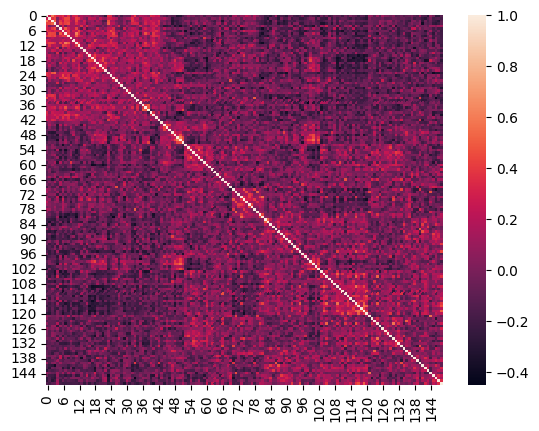

In [6]:
data_trans_heatmap = sb.heatmap(data_trans.corr())

plt.show()

## Create clustermap with correlation heatmap

/home/jenna/anaconda3/envs/5.analyze_data_NF1/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


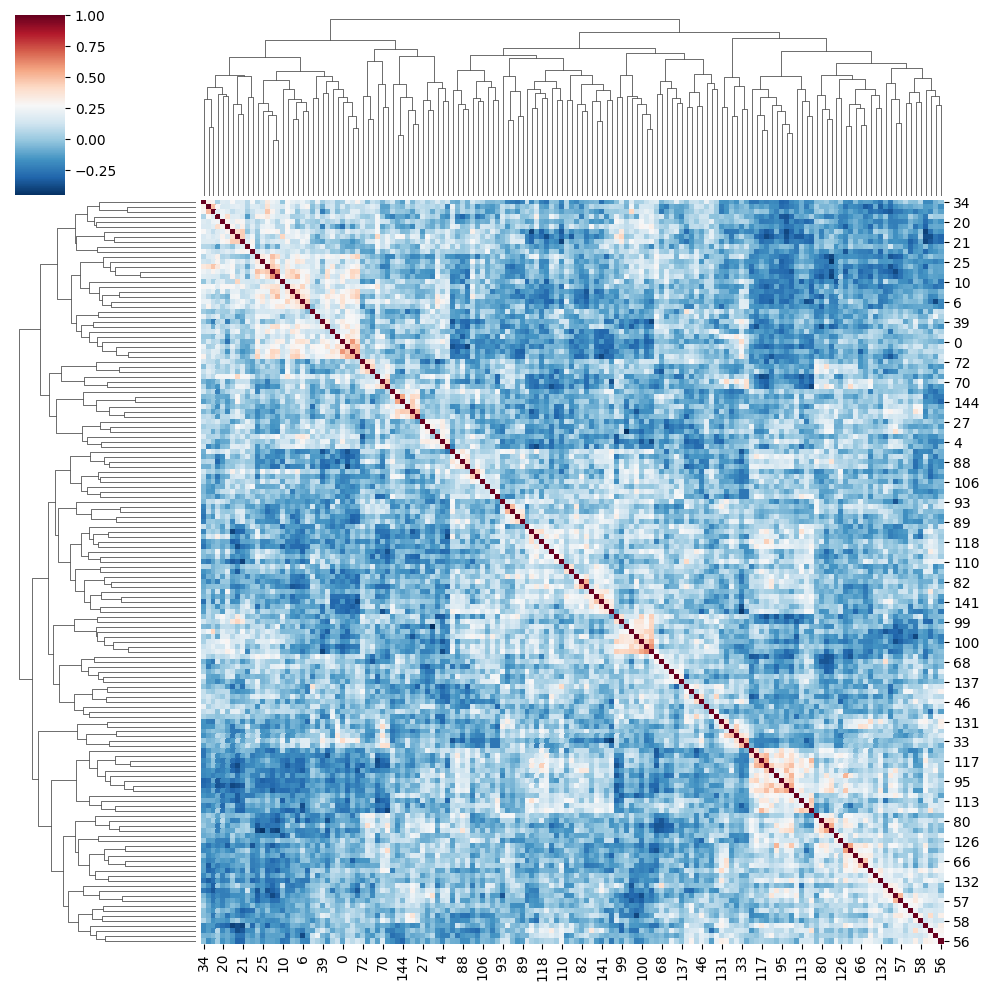

In [7]:
sb.clustermap(data_trans.corr(), 
            cmap='RdBu_r',
            )